# Examine the characteristics of RoBuster

In [45]:
# import 
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [46]:
corpus_file = '/mnt/nas2/data/Projects/PAWLS/export.token.csv'

In [47]:
df = pd.read_csv (corpus_file, low_memory=False)

In [48]:
df.head()

,pdf,page_index,index,text,x1,y1,x2,y2,roger.hilfiker@proton.me
0,Zoheiry_2017_Stair_Climb_Hilfiker,0,0,2201,513.4753,795.4634,532.9153,805.4634,NaN
1,Zoheiry_2017_Stair_Climb_Hilfiker,0,1,Original,62.3622,146.5782,102.8262,158.5782,NaN
2,Zoheiry_2017_Stair_Climb_Hilfiker,0,2,Article,105.8262,146.5782,139.3062,158.5782,NaN
3,Zoheiry_2017_Stair_Climb_Hilfiker,0,3,Effect,62.3622,169.4811,105.8482,186.4811,NaN
4,Zoheiry_2017_Stair_Climb_Hilfiker,0,4,of,110.0982,169.4811,125.9762,186.4811,NaN


In [49]:
# Filter out the out-of-span annotations (or NaN)

df_filtered = df[df['roger.hilfiker@proton.me'].notna()].copy()

In [50]:
df_filtered.head()

,pdf,page_index,index,text,x1,y1,x2,y2,roger.hilfiker@proton.me
862,Zoheiry_2017_Stair_Climb_Hilfiker,1,294,The,73.7008,312.4167,88.4733,321.9167,1_1_No_Bad
863,Zoheiry_2017_Stair_Climb_Hilfiker,1,295,study,90.6868,312.4167,111.2733,321.9167,1_1_No_Bad
864,Zoheiry_2017_Stair_Climb_Hilfiker,1,296,was,113.4868,312.4167,128.2593,321.9167,1_1_No_Bad
865,Zoheiry_2017_Stair_Climb_Hilfiker,1,297,designed,130.4823,312.4167,164.2548,321.9167,1_1_No_Bad
866,Zoheiry_2017_Stair_Climb_Hilfiker,1,298,as,166.4683,312.4167,174.3818,321.9167,1_1_No_Bad


In [51]:
# Total number of annotated tokens

print(df_filtered.shape[0])

23724


In [52]:
df_filtered['sq'] = df_filtered['roger.hilfiker@proton.me'].str[:3]

In [53]:
df_filtered.head()

,pdf,page_index,index,text,x1,y1,x2,y2,roger.hilfiker@proton.me,sq
862,Zoheiry_2017_Stair_Climb_Hilfiker,1,294,The,73.7008,312.4167,88.4733,321.9167,1_1_No_Bad,1_1
863,Zoheiry_2017_Stair_Climb_Hilfiker,1,295,study,90.6868,312.4167,111.2733,321.9167,1_1_No_Bad,1_1
864,Zoheiry_2017_Stair_Climb_Hilfiker,1,296,was,113.4868,312.4167,128.2593,321.9167,1_1_No_Bad,1_1
865,Zoheiry_2017_Stair_Climb_Hilfiker,1,297,designed,130.4823,312.4167,164.2548,321.9167,1_1_No_Bad,1_1
866,Zoheiry_2017_Stair_Climb_Hilfiker,1,298,as,166.4683,312.4167,174.3818,321.9167,1_1_No_Bad,1_1


In [54]:
item_counts = df_filtered['sq'].value_counts()

In [83]:
to_remove = ['1_3', '3_1', '2_2', '1_1']
item_counts_filtered = item_counts.drop(to_remove)

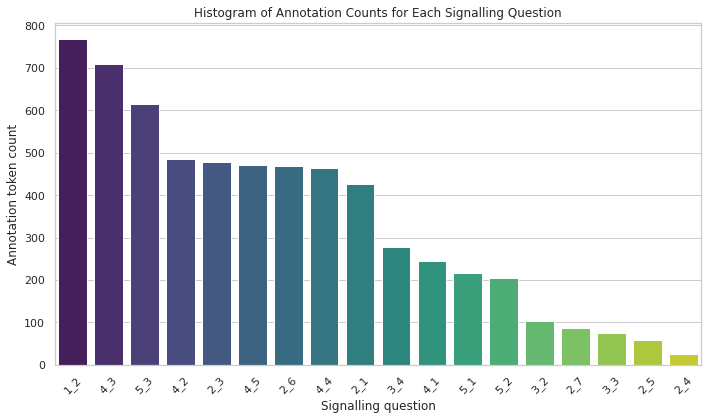

In [84]:
# Set the style
sns.set(style='whitegrid')

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts_filtered.index, y=item_counts_filtered.values, palette='viridis')

plt.xlabel('Signalling question')
plt.ylabel('Annotation token count')
plt.title(f'Histogram of Annotation Counts for Each Signalling Question')
plt.xticks(rotation=45)

plt.tight_layout()

# Save the plot as an image in a folder
output_folder = 'images'  # Change to your desired folder path
output_filename = 'sq_ann_raw_counts.png'  # Change to your desired file name
output_path = f'{output_folder}/{output_filename}'

plt.savefig(output_path)

plt.show()

In [56]:
# Create a dictionary to store frequencies
frequency_dict = {}

# Calculate and store the frequency for each item
for item, count in item_counts.items():
    frequency = count / df_filtered.shape[0]
    frequency_dict[item] = frequency

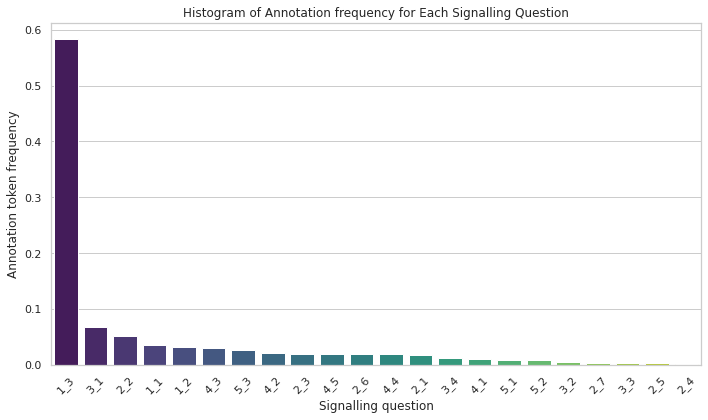

In [57]:
# Convert the dictionary to a DataFrame for plotting
frequency_df = pd.DataFrame(frequency_dict.items(), columns=['Items', 'Frequency'])

# Set seaborn style
sns.set(style='whitegrid')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Items', y='Frequency', data=frequency_df, palette='viridis')

plt.xlabel('Signalling question')
plt.ylabel('Annotation token frequency')
plt.title(f'Histogram of Annotation frequency for Each Signalling Question')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Good vs. Bad: How are the biases in our corpus?

In [58]:
df_filtered['judgment'] = df_filtered['roger.hilfiker@proton.me'].str.split('_').str[-1]
df_filtered['sq'] = df_filtered['roger.hilfiker@proton.me'].str[0:3]

In [59]:
grouped_pdf = df_filtered.groupby('pdf')

In [60]:
# Initialize a dictionary with the question numbers and set values to 0, then print it in one line
central_dict = {"1_1": [], "1_2": [], "1_3": [], "2_1": [], "2_2": [], "2_3": [], "2_4": [], "2_5": [], "2_6": [], "2_7": [], "3_1": [], "3_2": [], "3_3": [], "3_4": [], "3_5": [], "4_1": [], "4_2": [], "4_3": [], "4_4": [], "5_1": [], "5_2": [], "5_3": []}

for i, (category, grouped_data) in enumerate(grouped_pdf):

    # get judgments for all signalling questions
    gpd_sq_data = grouped_data.groupby('sq')
    
    # Initialize a dictionary with the question numbers and set values to 0, then print it in one line
    temp_dict = {"1_1": 'Information', "1_2": 'Information', "1_3": 'Information',
                 "2_1": 'Information', "2_2": 'Information', "2_3": 'Information', "2_4": 'Information', "2_5": 'Information', "2_6": 'Information', "2_7": 'Information', 
                 "3_1": 'Information', "3_2": 'Information', "3_3": 'Information', "3_4": 'Information', "3_5": 'Information',
                 "4_1": 'Information', "4_2": 'Information', "4_3": 'Information', "4_4": 'Information',
                 "5_1": 'Information', "5_2": 'Information', "5_3": 'Information'}
    
    # Add the response judgments to the temp_dict
    for j, (sq, grouped_sq) in enumerate(gpd_sq_data):
        if sq in temp_dict:
            temp_dict[sq] = list( set(list(grouped_sq['judgment'])) )[0]
            
    for k,v in temp_dict.items():
        central_dict[k].append( v )

In [61]:
# get count information from the central_dict and plot...
central_count_dict = dict()
for k, v in central_dict.items():
    central_count_dict[k] = dict(Counter(v))

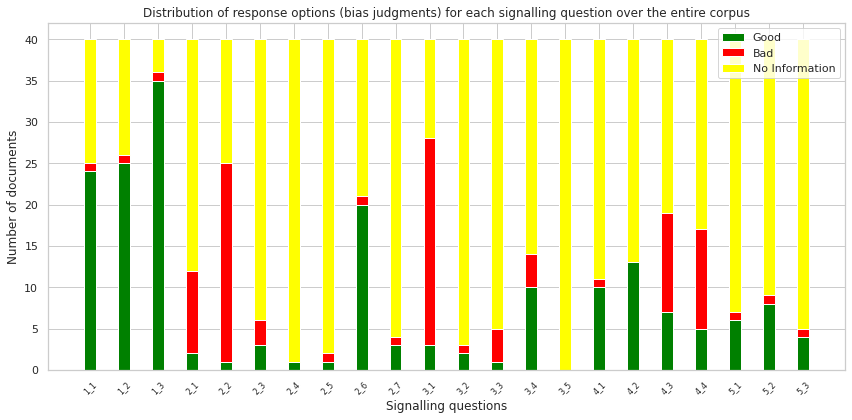

In [62]:
# Extract the keys and counts for each category
keys = list(central_count_dict.keys())
good_counts = [entry.get('Good', 0) for entry in central_count_dict.values()]
bad_counts = [entry.get('Bad', 0) for entry in central_count_dict.values()]
info_counts = [entry.get('Information', 0) for entry in central_count_dict.values()]

# Set the colors
colors = ['green', 'red', 'yellow']

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(keys))

p1 = plt.bar(index, good_counts, bar_width, color=colors[0], label='Good')
p2 = plt.bar(index, bad_counts, bar_width, color=colors[1], bottom=good_counts, label='Bad')
p3 = plt.bar(index, info_counts, bar_width, color=colors[2], bottom=np.array(good_counts) + np.array(bad_counts), label='No Information')

plt.xlabel('Signalling questions')
plt.ylabel('Number of documents')
plt.title('Distribution of response options (bias judgments) for each signalling question over the entire corpus')
plt.xticks(index, keys, rotation=45, fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()

## Extended statistics

In [63]:
# mean length of the annotation for each signalling question.

rob_len_dict = dict()

for i, (category, grouped_data) in enumerate(grouped_pdf):

    gpd_sq_data = grouped_data.groupby('sq')
    
    for j, (sq, grouped_sq) in enumerate(gpd_sq_data):
        rob_sq_len = len(list(grouped_sq['text']))
        if sq not in rob_len_dict:
            rob_len_dict[sq] = [ rob_sq_len ]
        else:
            rob_len_dict[sq].append( rob_sq_len )

In [64]:
for k,v in rob_len_dict.items():
    #print( f'The average length of annotation for RoB {k} is: ', sum(v) / len(v) )
    q =  "RoB" + str(k).replace('_', '.')
    print(q, ",", sum(v), ",", sum(v) / len(v), ",", len(v))

RoB1.1 , 850 , 28.333333333333332 , 30
RoB1.3 , 13841 , 384.47222222222223 , 36
RoB2.1 , 426 , 35.5 , 12
RoB2.2 , 1240 , 49.6 , 25
RoB2.3 , 479 , 79.83333333333333 , 6
RoB3.4 , 277 , 19.785714285714285 , 14
RoB4.5 , 470 , 42.72727272727273 , 11
RoB3.1 , 1617 , 57.75 , 28
RoB4.2 , 485 , 37.30769230769231 , 13
RoB4.4 , 463 , 27.235294117647058 , 17
RoB5.2 , 205 , 22.77777777777778 , 9
RoB1.2 , 768 , 24.774193548387096 , 31
RoB4.3 , 709 , 33.76190476190476 , 21
RoB5.3 , 615 , 102.5 , 6
RoB2.6 , 469 , 21.318181818181817 , 22
RoB4.1 , 245 , 22.272727272727273 , 11
RoB2.7 , 87 , 21.75 , 4
RoB3.2 , 103 , 34.333333333333336 , 3
RoB5.1 , 217 , 31.0 , 7
RoB3.3 , 75 , 15.0 , 5
RoB2.5 , 58 , 29.0 , 2
RoB2.4 , 25 , 25.0 , 1


### Is bias higher in subjective outcomes compared to the objective/mortality outcomes?

In [71]:
outcome_types_dict = {
    'Hassett_2020_upright_Time_Hilfiker_with_Protocol': 'o',
    'Kudos_2019_weight_Loss_Hilfiker_with_Protocol': 'o',
    'Mills_2019_VeryLowDensityLipoProtein_Hilfiker_with_Protocol': 'o',
    'Wyke_2019_steps_per_day_Hilfiker_with_Protocol': 'o',
    'Thorndike_2014_mean_steps_day_Hilfiker': 'o',
    'Dangour_2011_incidence_Pneumonia_Hilfiker_with_Protocol': 'o',
    'Cameron_2013_Frailty_Hilfiker_with_Protocol': 'o',
    'Taylor_2016_CPG_12months_Hilfiker_with_Protocol': 's',
    'Myer_2018_Infant_Mortality_Hilfiker_with_Protocol': 'o',
    'Lockman_2012_death_Hilfiker_withProtocol': 'o',
    'Stuck_2015_allcausemortality_Hilfiker_withProtocol': 'o',
    'Kc_2019_intrapartum-related_mortality_Hilfiker_withProtocol': 'o',
    'Jourdain_2013_death_KM_Hilfiker_withProtocol': 'o',
    'Gallagher_2014_Mortality_Hilfiker_withProtocol': 'o',
    'Tanaka_2020_carotid_atherosclerosis_Hilfiker_withProtocol': 'o',
    'Oyamo_2016_carotidArteryIMT24mo_Hilfiker_withProtocol': 'o',
    'Zhang_2020_frequencyHIVTesting_Hilfiker_withProtocol': 'o',
    'Li_2019_BMI_Hilfiker_with_Protocol': 'o',
    'Mohold_2012_peakOxygenUptake_Hilfiker_withProtocol': 'o',
    'Harris_2017_stepCount_Hilfiker_withProtocl': 'o',
    'Hardeman_2020_activity_volume_Hilfiker_withProtocol': 'o',
    'Garnaes_2016_GWG_Hilfiker_with_Protocol': 'o',
    'Gajados_2010_8hWithoutOxygen_Hilfiker_withProtocol': 'o',
    'Menant_2018_DizzinessHandicapInventory_Hilfiker_Protocol': 's',
    'Merom_2016_PPA_Hilfiker_with_Protocol': 'o s',
    'Nieman_2014_RPE_Hilfiker_withProtocol': 's',
    'Perlman_2012_WOMAC_Total_8weeks_Hilfiker_with_Protocol': 's',
    'Slater_2013_BackPainBeliefs_Hilfiker_withProtocol': 's',
    'Lawlor_2018_ADAS-Cog12_Hilfiker_with_Protocol': 's',
    'Barker_2019_Falls_per_PersonYear_Hilfiker_withProtocol': 's',
    'Bjerre_2019_QoL_Hilfiker_withProtocol': 's',
    'Or_2020_Self_Efficacy_24_weeks_with_Protocol': 's',
    'Pasha_2013_mean_perinatal_mortality_IAA_Hilfiker_Sattelmayer_with_Protocol': 'o',
    'Cannata-Andía_2022_Death_Rate_IAA_Hilfiker_Sattelmayer_with_Protocol': 'o',
    'Darlow_2019_Roland_Morris_Disability_Q_sixMonths_IAA_Hilfiker_Sattelmayer_with_Protocol': 's',
    'Lagro_2022_HealthLiveBirth_IAA_Hilfiker_Sattelmayer_with_Protocol': 'o',
    'Osteras_2019_Patient_Reporting_Quality_of_Care_6months_IAA_Hilfiker_Sattelmayer_with_Protocol': 's',
    'Rossetti_2020_RiskRatio_Death_sixmonths_Hilfiker_with_Protocol': 'o',
    'Ren_2020_Mortality_at_Discharge_Hilfiker_with_Protocol': 'o',
    'Friedli_2020_mortality_within_180days_IAA_Hilfiker_Sattelmayer_with_Protocol': 'o',
    'Becker_2020_restriction_muscle_strength_at_3rdFollowup_up_IAA_Hilfiker_Sattelmayer_no_protocol_found': 'o',
    'Pan_2016_VAS_Hilfiker': 'o',
    'An_2020_VO2peak_at_6months_IAA_Hilfiker_Sattelmayer_with_Protocol': 'o',
    'Román_2016_TUG_Hilfiker_with_Protocol': 'o',
    'Solomons_2020_VISA_A_12months_IAA_Hilfiker_Sattelmayer_with_Protocol': 's',
    'Stoerkel_2018_Anxiety_Follow_up_Hilfiker_with_Protocol': 's',
    'Tagalidou_2019_Coping_Humour_Scale_Hilfiker_with_Protocol': 's',
    'Xu_2018_KSS_Hilfiker_No_Protocol': 's',
    'Raeissadat_2020_VAS_Pain_12month_Hilfiker_with_Protocol': 's',
    'Remsik_2019_stroke_impact_scale_follow_up_Hilfiker_with_Protocol': 's',
    'Eskilsson_2017_Burnout_T2_Hilfiker_with_Protocol': 's',
    'Ahmadi_2018_Craving_Score_Day_5_Hilfiker_with_Protocol': 's',
    'Jacobsen_2020_pain_timepoint3_Hilfiker_with_Protocol': 'o',
    'Bai_2020_GAD_7_at_3monts_IAA_Hilfiker_Sattelmayer_with_Protocol': 's',
    'Bierre_2019_BMD_Hilfiker_with_Protocol': 'o',
    'Liu_2018_SPPB_Hilfiker_with_Protocol': 'o',
    'Rodrigo-Claverol_2019_WOMAC_Post_Hilfiker_No_Protocol': 's',
    'Gleason_2015_3ms_48months_with_protocol': 's',
    'Merom_2016_falls_with_protocol': 'o',
    'lombard_2016_weigth_change_Hilfiker_with_protocol': 'o'
}

In [74]:
subjective_judgments = []
objective_judgments = []

for i, (category, grouped_data) in enumerate(grouped_pdf):
    if category in outcome_types_dict:
        out_type = outcome_types_dict[category]
        if 's' in out_type:
            print(grouped_data['judgment'])
        elif 'o' in out_type:
            print('')

284622    Good
284623    Good
284624    Good
284625    Good
284626    Good
          ... 
286465    Good
286466    Good
286467    Good
286468    Good
286469    Good
Name: judgment, Length: 407, dtype: object

848458    Good
848459    Good
848460    Good
848461    Good
848462    Good
          ... 
856509     Bad
856510     Bad
856511     Bad
856512     Bad
856513     Bad
Name: judgment, Length: 437, dtype: object
735838    Good
735839    Good
735840    Good
735841    Good
735842    Good
          ... 
738960    Good
738961    Good
738966    Good
738967    Good
742412    Good
Name: judgment, Length: 686, dtype: object



12585     Bad
12586     Bad
12587     Bad
12588     Bad
12589     Bad
         ... 
23193    Good
23194    Good
23195    Good
23196    Good
23197    Good
Name: judgment, Length: 942, dtype: object
582225    Information
582226    Information
582227    Information
582228    Information
582229    Information
             ...     
590547           Good
590548           Good